### <font size=5px color="#95C7AE"> Reinforcement Learning Quantum Local Search 

In [1]:
from dwave_qbsolv import QBSolv
import numpy as np
import csv
import itertools
from time import time 
import datetime
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import networkx as nx
import random 
import math
from scipy.optimize import minimize, basinhopping

### <font size=5px color="#95C7AE"> Training result analysis

#### <font size=5px color="#95C7AE"> Summary 

In [8]:
reward_data_32_pick_5  = np.load("32_pick_5/1000ham_impala_2000iter_train_reward_list_mean_list.dat",allow_pickle=True )[0]
reward_data_64_pick_5  = np.load("64_pick_5/1000ham_impala_2000iter_train_reward_list_mean_list.dat",allow_pickle=True )[0]
reward_data_128_pick_5 = np.load("128_pick_5/1000ham_impala_2000iter_train_reward_list_mean_list.dat",allow_pickle=True )[0]
reward_data_128_pick_5_round2 = np.load("128_pick_5/1000ham_impala_2000iter_2nd_round_train_reward_list_mean_list.dat",allow_pickle=True )[0]
reward_data_128_pick_5_round3 = np.load("128_pick_5/1000ham_impala_2000iter_3rd_round_train_reward_list_mean_list.dat",allow_pickle=True )[0]

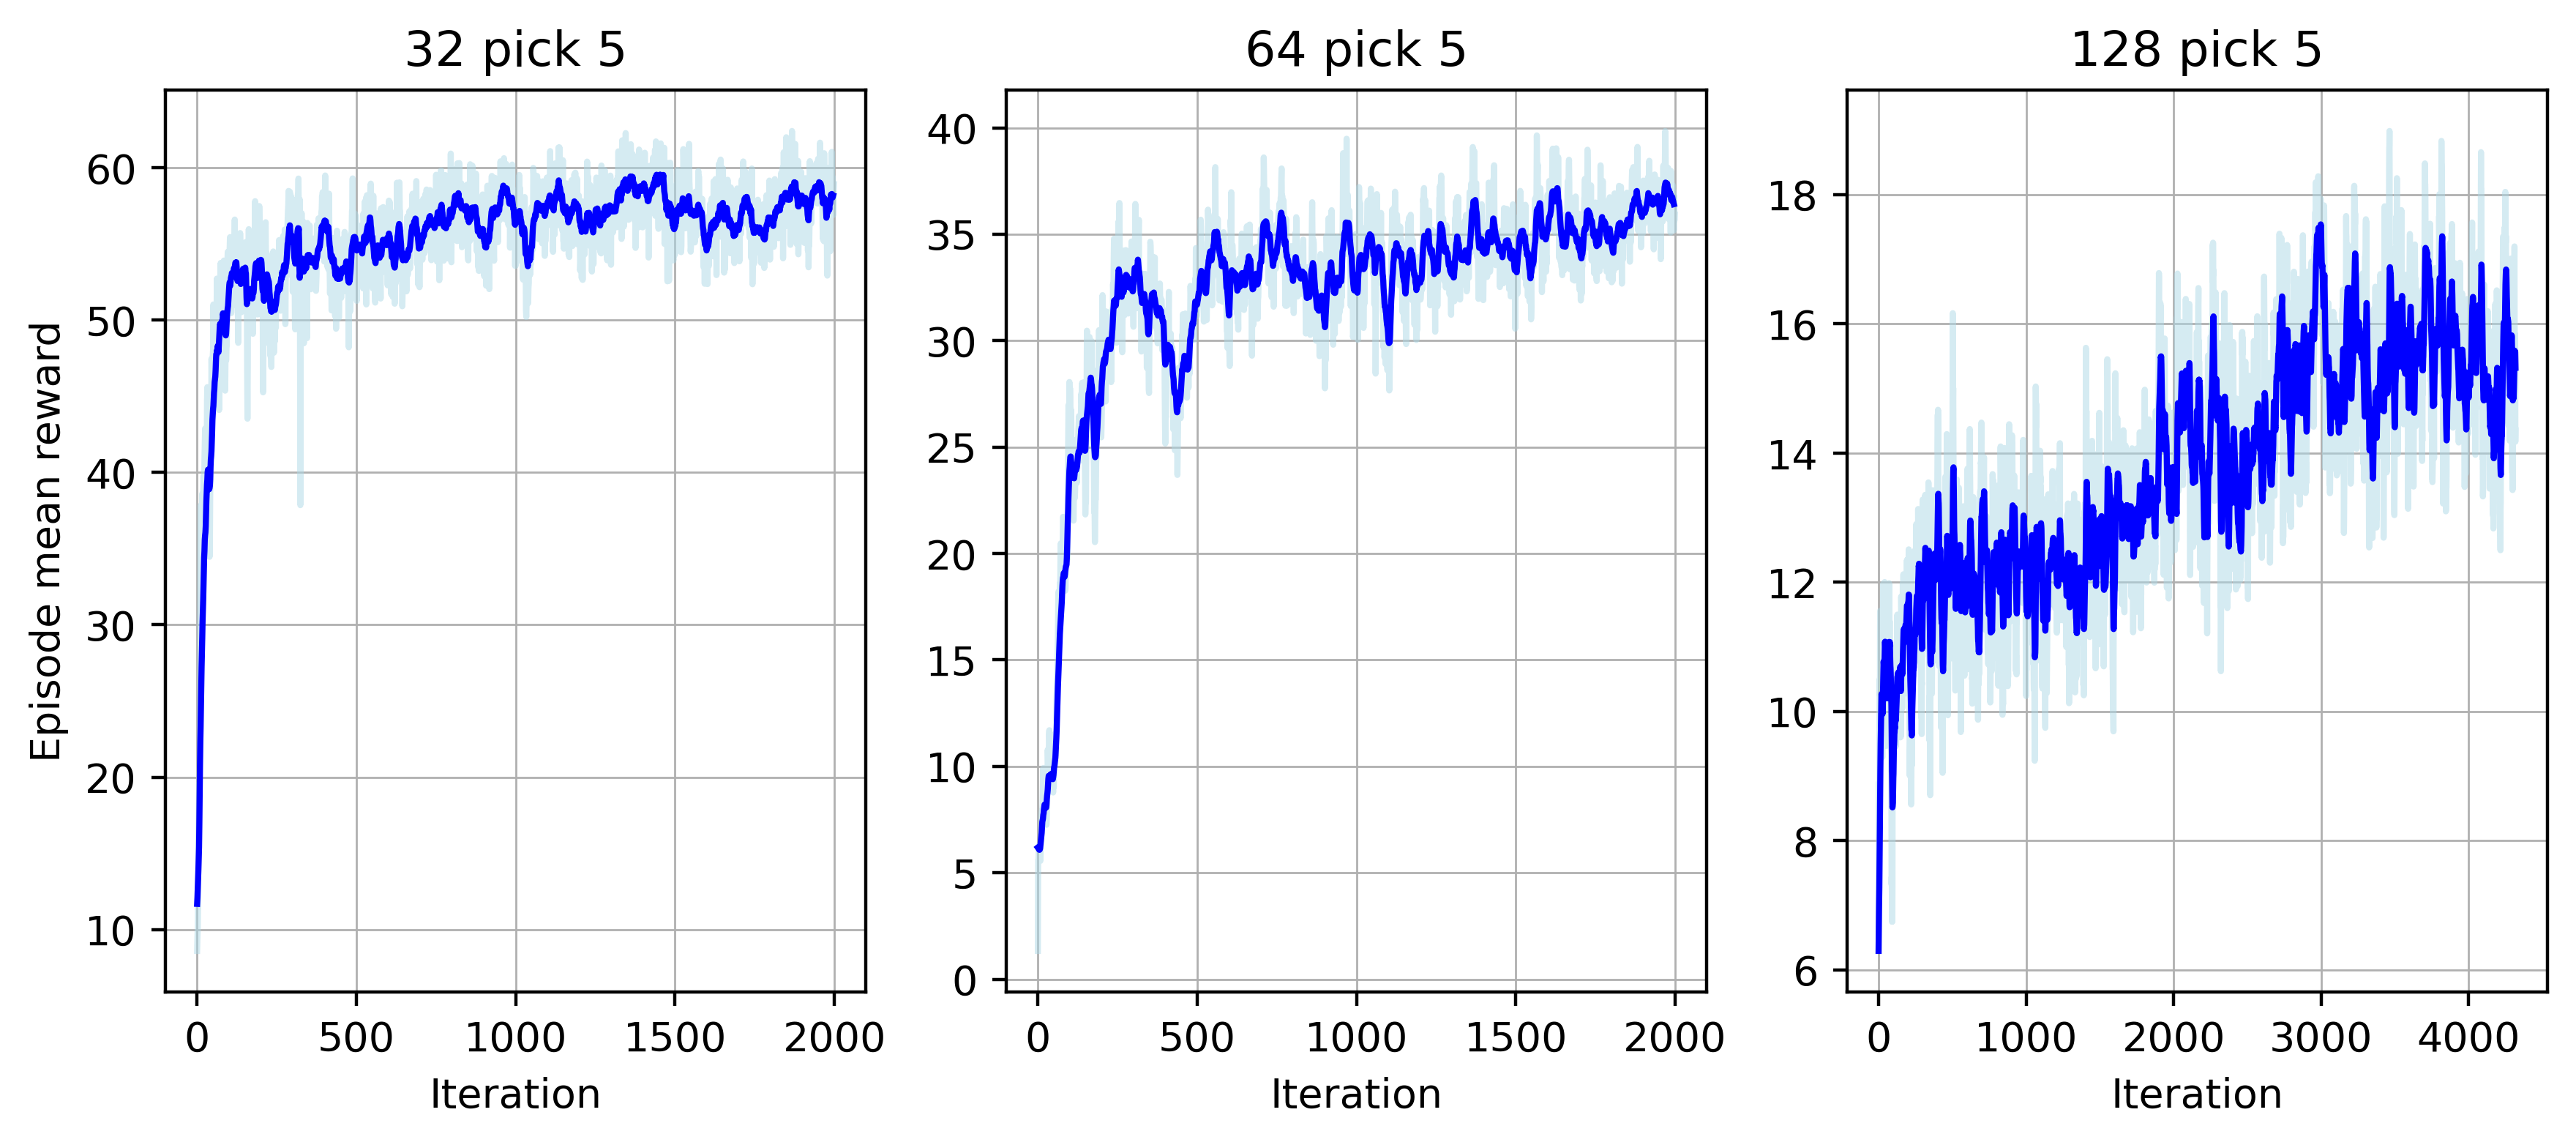

In [9]:

plt.style.use("default")
%config InlineBackend.figure_format='retina'

def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

plt.figure(figsize=(3.5*3,4), dpi = 200)

plt.subplot(1,3,1)
plt.plot(reward_data_32_pick_5, color = 'lightblue', alpha = 0.5)
plt.plot(smooth(reward_data_32_pick_5[3:], 0.9), color = "b") #, label = "32 pick 5")
#plt.ylim(-0.15, 0.15)
plt.title("32 pick 5")
plt.ylabel("Episode mean reward")
#plt.legend(loc = "best")
plt.xlabel("Iteration")
plt.grid(lw = 0.5)

plt.subplot(1,3,2)
plt.plot(reward_data_64_pick_5, color = 'lightblue', alpha = 0.5)
plt.plot(smooth(reward_data_64_pick_5[3:], 0.9), color = "b") #, label = "64 pick 5")
plt.title("64 pick 5")
#plt.ylabel("Episode mean reward")
#plt.legend(loc = "best")
plt.xlabel("Iteration")
plt.grid(lw = 0.5)


plt.subplot(1,3,3)
plt.plot(list(reward_data_128_pick_5[3:])+list(reward_data_128_pick_5_round2[3:])+list(reward_data_128_pick_5_round3[3:]), color = 'lightblue', alpha = 0.5)
plt.plot(smooth(list(reward_data_128_pick_5[3:])+list(reward_data_128_pick_5_round2[3:])+list(reward_data_128_pick_5_round3[3:]), 0.9), color = "b") #, label = "128 pick 5")
#plt.ylabel("Episode mean reward")
#plt.legend(loc = "best")
plt.title("128 pick 5")
plt.xlabel("Iteration")
plt.grid(lw = 0.5)
plt.show()


### <font size=5px color="#95C7AE"> Test the trained agent

#### <font size=5px color="#95C7AE"> Summary 

In [6]:
approximation_ratio_list_random_list_32_pick_5 = np.load("32_pick_5/approximation_ratio_list_random_list.dat", allow_pickle = True)
approximation_ratio_list_rl_impala_list_32_pick_5 = np.load("32_pick_5/approximation_ratio_list_rl_impala_list.dat", allow_pickle = True)

approximation_ratio_list_random_list_64_pick_5 = np.load("64_pick_5/approximation_ratio_list_random_list_test1.dat", allow_pickle = True)
approximation_ratio_list_rl_impala_list_64_pick_5 = np.load("64_pick_5/approximation_ratio_list_rl_impala_list_test1.dat", allow_pickle = True)

approximation_ratio_list_random_list_128_pick_5 = np.load("128_pick_5/approximation_ratio_list_random_list_test3.dat", allow_pickle = True)
approximation_ratio_list_rl_impala_list_128_pick_5 = np.load("128_pick_5/approximation_ratio_list_rl_impala_list_test3.dat", allow_pickle = True)


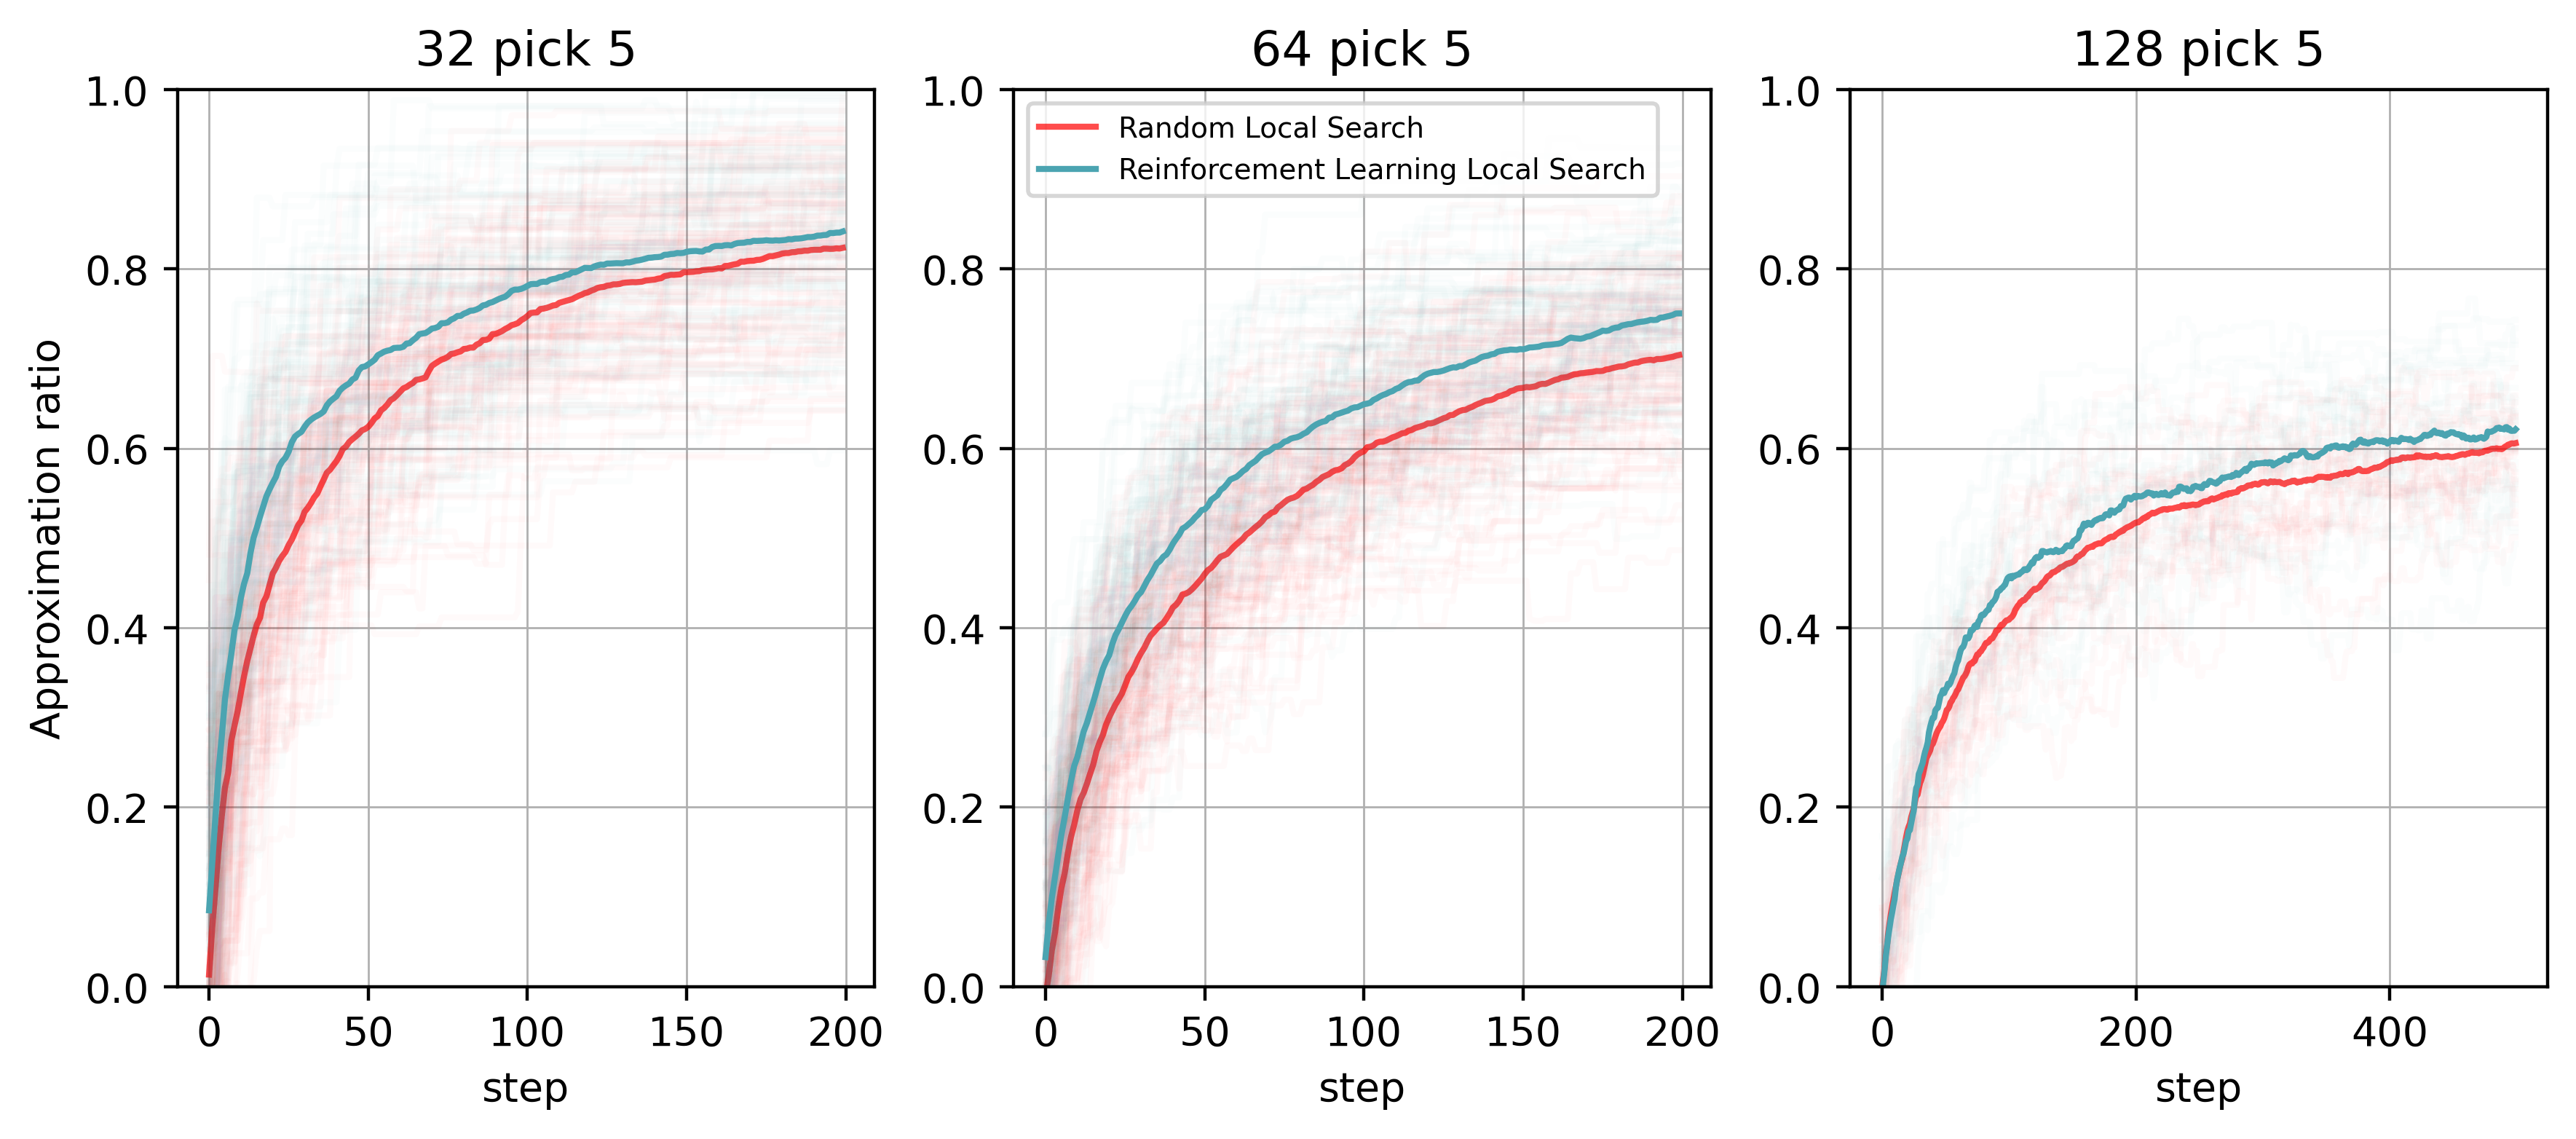

In [7]:


plt.style.use("default")
%config InlineBackend.figure_format='retina'


plt.figure(figsize=(3.5*3, 4), dpi = 200)

plt.subplot(1,3,1)

for i in range(len(approximation_ratio_list_random_list_32_pick_5)):
    plt.plot(approximation_ratio_list_random_list_32_pick_5[i], color = "r", alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_random_list_32_pick_5, axis = 0), label = "Random Local Search", color = "r", alpha = 0.7)

for i in range(len(approximation_ratio_list_rl_impala_list_32_pick_5)):
    plt.plot(approximation_ratio_list_rl_impala_list_32_pick_5[i], color = plt.cm.Spectral(0.85), alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_rl_impala_list_32_pick_5, axis = 0), label = "Reinforcement Learning Local Search", color = plt.cm.Spectral(0.85))

plt.title("32 pick 5")
plt.ylabel("Approximation ratio")
plt.xlabel("step")
plt.grid(lw = 0.5)
plt.ylim(0, 1) 

#plt.hlines(y=0.9, xmin = 0, xmax=500, color = "r", label = "0.9")
#plt.legend(frameon = True, loc = 4, fontsize = 8)

plt.subplot(1,3,2)

for i in range(len(approximation_ratio_list_random_list_64_pick_5)):
    plt.plot(approximation_ratio_list_random_list_64_pick_5[i], color = "r", alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_random_list_64_pick_5, axis = 0), label = "Random Local Search", color = "r", alpha = 0.7)

for i in range(len(approximation_ratio_list_rl_impala_list_64_pick_5)):
    plt.plot(approximation_ratio_list_rl_impala_list_64_pick_5[i], color = plt.cm.Spectral(0.85), alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_rl_impala_list_64_pick_5, axis = 0), label = "Reinforcement Learning Local Search", color = plt.cm.Spectral(0.85))

plt.title("64 pick 5")
plt.xlabel("step")
plt.grid(lw = 0.5)
plt.ylim(0, 1) 

#plt.hlines(y=0.9, xmin = 0, xmax=500, color = "r", label = "0.9")
plt.legend(frameon = True, loc = 2, fontsize = 7)

plt.subplot(1,3,3)

for i in range(len(approximation_ratio_list_rl_impala_list_128_pick_5)):
    plt.plot(approximation_ratio_list_random_list_128_pick_5[i], color = "r", alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_random_list_128_pick_5, axis = 0), label = "Random Local Search", color = "r", alpha = 0.7)

for i in range(len(approximation_ratio_list_rl_impala_list_128_pick_5)):
    plt.plot(approximation_ratio_list_rl_impala_list_128_pick_5[i], color = plt.cm.Spectral(0.85), alpha = 0.02)
plt.plot(np.average(approximation_ratio_list_rl_impala_list_128_pick_5, axis = 0), label = "Reinforcement Learning Local Search", color = plt.cm.Spectral(0.85))

plt.title("128 pick 5")
plt.xlabel("step")
plt.grid(lw = 0.5)
plt.ylim(0, 1) 

#plt.hlines(y=0.9, xmin = 0, xmax=500, color = "r", label = "0.9")
#plt.legend(frameon = True, loc = 4, fontsize = 8)

plt.show()



